# **Time series prediction of stock price data(TESLA)**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


importing the dataset which is historic stock price values of Tesla

In [0]:
data=pd.read_csv('./TSLA.csv')

In [0]:
import seaborn as sn
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999299,0.999407,0.998791,0.998791,0.529267
High,0.999299,1.000000,0.998991,0.999440,0.999440,0.542520
Low,0.999407,0.998991,1.000000,0.999424,0.999424,0.518523
Close,0.998791,0.999440,0.999424,1.000000,1.000000,0.531279
Adj Close,0.998791,0.999440,0.999424,1.000000,1.000000,0.531279
Volume,0.529267,0.542520,0.518523,0.531279,0.531279,1.000000


As expected we see a strong positive relation between most values such as opening,closing ,high and low values of stock

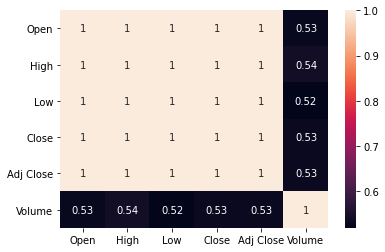

In [0]:
sn.heatmap(data.corr(), annot=True)

In [0]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


THe sock does show an erratic behavior of suddenly increasing towards the last 3 years

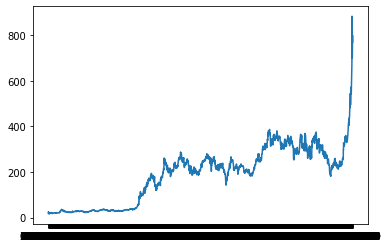

In [0]:
plt.plot(data['Date'],data['Open'])

In [0]:
df=data.iloc[:, 1:3].values

In [0]:
df.shape

(2422, 2)

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dfc = sc.fit_transform(df)

In [0]:
df[:,0]

array([ 19.      ,  25.790001,  25.      , ..., 730.549988, 800.      ,
       768.789978])

In [0]:
sc1=MinMaxScaler(feature_range = (0, 1))
opens=sc1.fit_transform(np.array(df[:,0]).reshape(2422,1))

In [0]:
dfn=np.array(dfc)

In [0]:
dfc[20:40]

array([[0.00508756, 0.0044836 ],
       [0.00534136, 0.0044626 ],
       [0.00468379, 0.00400059],
       [0.00502988, 0.0045571 ],
       [0.0056067 , 0.00558613],
       [0.00670266, 0.00582763],
       [0.00622967, 0.00516611],
       [0.00456842, 0.00370658],
       [0.0043377 , 0.00351758],
       [0.00404928, 0.00317107],
       [0.00294179, 0.00236255],
       [0.00191505, 0.00133353],
       [0.00235343, 0.00191104],
       [0.00266492, 0.00227855],
       [0.00325327, 0.00290857],
       [0.00398007, 0.00310807],
       [0.00276874, 0.00275106],
       [0.00289564, 0.00260406],
       [0.00340325, 0.00394809],
       [0.00358783, 0.00323407]])

# **Tactic to create training data**

We consider the opening prices of last i-20 days and predict value for the i+1 day where 20< i < data.length 

In [0]:
x=[]
y=[]
a=20
for i in range(a,len(dfn)):
    x.append(dfc[i-a:i])
    y.append(dfc[i:i+1,0])  


In [0]:
X=np.array(x)
Y=np.array(y)
#X_train=np.reshape(X, (X.shape[0], X.shape[1], 1))
# temp=[]
# for i in x[0:2]:
#     temp.append(i)
print(X.shape)
Y=Y.reshape(Y.shape[0],1)

(2402, 20, 2)


In [0]:
print(X.shape)
print(Y.shape)

(2402, 20, 2)
(2402, 1)


# LSTM MODEL

In [0]:
serie_size =  X.shape[1] # 20
n_features =  X.shape[2] # 2
lstm_model = Sequential()
lstm_model.add(LSTM(15, input_shape=(serie_size, n_features), return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(10, activation='relu', return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(3, activation='relu'))
lstm_model.add(Dense(10, kernel_initializer='glorot_normal', activation='relu'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(10, kernel_initializer='glorot_normal', activation='relu'))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mse', optimizer='adam')

In [0]:
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 20, 15)            1080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 20, 15)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 20, 10)            1040      
_________________________________________________________________
dropout_5 (Dropout)          (None, 20, 10)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 3)                 168       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                40        
_________________________________________________________________
dropout_6 (Dropout)          (None, 10)               

In [0]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [0]:
X_train[0]

array([[0.24595647, 0.2318346 ],
       [0.2638264 , 0.24283884],
       [0.26877551, 0.24726994],
       [0.25883112, 0.25193204],
       [0.27437068, 0.26367129],
       [0.28876815, 0.26535134],
       [0.28190396, 0.25640515],
       [0.27094437, 0.25448359],
       [0.2692139 , 0.24693394],
       [0.26807179, 0.25081902],
       [0.27325165, 0.25222605],
       [0.27130199, 0.24987401],
       [0.27236334, 0.25376958],
       [0.27339008, 0.24963249],
       [0.2654761 , 0.24888698],
       [0.26862555, 0.24598891],
       [0.26851018, 0.24924399],
       [0.27326318, 0.25279307],
       [0.27215569, 0.25106052],
       [0.27296324, 0.25029401]])

# TRAINING LSTM MODEL

In [0]:
lstm_history = lstm_model.fit(X_train, y_train, epochs=30, batch_size=64)

Epoch 1/30
2161/2161 [==============================] - 2s 910us/step - loss: 0.0299
Epoch 2/30
2161/2161 [==============================] - 1s 379us/step - loss: 0.0091
Epoch 3/30
2161/2161 [==============================] - 1s 364us/step - loss: 0.0052
Epoch 4/30
2161/2161 [==============================] - 1s 364us/step - loss: 0.0042
Epoch 5/30
2161/2161 [==============================] - 1s 365us/step - loss: 0.0033
Epoch 6/30
2161/2161 [==============================] - 1s 361us/step - loss: 0.0030
Epoch 7/30
2161/2161 [==============================] - 1s 365us/step - loss: 0.0025
Epoch 8/30
2161/2161 [==============================] - 1s 367us/step - loss: 0.0025
Epoch 9/30
2161/2161 [==============================] - 1s 363us/step - loss: 0.0025
Epoch 10/30
2161/2161 [==============================] - 1s 378us/step - loss: 0.0021
Epoch 11/30
2161/2161 [==============================] - 1s 368us/step - loss: 0.0020
Epoch 12/30
2161/2161 [==============================] - 1s 379

In [0]:

preds=lstm_model.predict(X_test[-40:])

In [0]:
preds

array([[0.01557763],
       [0.31293195],
       [0.28636488],
       [0.18904546],
       [0.19225357],
       [0.22337306],
       [0.16841365],
       [0.21910149],
       [0.12370718],
       [0.28559092],
       [0.1595794 ],
       [0.01554009],
       [0.01552917],
       [0.18486857],
       [0.19660392],
       [0.01557983],
       [0.01556586],
       [0.20014775],
       [0.20747583],
       [0.20274794]], dtype=float32)

# **comparing actual value(blue line) to the predicted values(red line)**

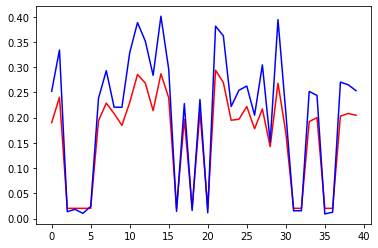

In [0]:
plt.plot(preds,color='red')
plt.plot(y_test[-40:],color='blue')

**The Model has more or less learned to predict the trend in which the stock is going to go
but there is still loss in accuracy as the predicted value, even though predicts trends, does not come very close to the actual value of stocks over a long time**

In [0]:
lstm_model.save_weights("tsla lstm dropout.h5")
print("Saved model to disk")
 

Saved model to disk


In [0]:
a=np.array([1,2,3])
b=np.array([-1,-1,-1])
#print(np.subtract(preds,y_test[-20:]))
absolute_error_sum=0
for i in np.subtract(preds,y_test[-20:]):
    absolute_error_sum+=abs(i)
print(absolute_error_sum)

[0.47263554]


checking trend predictions for our lstm **model**

In [0]:
actual_predictions=sc1.inverse_transform(preds)
actual_prices=sc1.inverse_transform(y_test[-40:])
wrong_predictions=0
right_predictions=0
for i in range(1,len(actual_predictions)):
    p="up"
    a="up"
    if(actual_predictions[i-1]<actual_predictions[i]):
        p="up"
    else:
        p="down"
    if(actual_prices[i-1]<actual_prices[i]):
        a="up"
    else:
        a="down"
    print("{}-------{}".format(p,a))
    if(p!=a):
        wrong_predictions+=1
    else:
        right_predictions+=1
print("wrong={}\nright={}".format(wrong_predictions,right_predictions))
    

up-------up
down-------down
down-------up
down-------down
up-------up
up-------up
up-------up
down-------down
down-------down
up-------up
up-------up
down-------down
down-------down
up-------up
down-------down
down-------down
up-------up
down-------down
up-------up
down-------down
up-------up
down-------down
down-------down
up-------up
up-------up
down-------down
up-------up
down-------down
up-------up
down-------down
down-------down
up-------up
up-------up
up-------down
down-------down
up-------up
up-------up
up-------down
down-------down
wrong=3
right=36


# Gradient boosting models(XGBoost Regressor)

In [0]:
dfxg=data.iloc[:, 1].values
# dfxg=np.array(dfxg)
xgx=[]
xgy=[]
a=20
for i in range(a,len(dfxg)):
    xgx.append(dfxg[i-a:i])
    xgy.append(dfxg[i:i+1])  


In [0]:
xgx_train, xgx_test, xgy_train, xgy_test = train_test_split(xgx, xgy, test_size=0.1, random_state=42)




In [0]:
from xgboost import XGBRegressor
reg=XGBRegressor(max_depth=8,
    n_estimators=10000,
    min_child_weight=500, 
    colsample_bytree=0.9, 
    subsample=1.0, 
    eta=0.5,    
    seed=201)
reg.fit(xgx_train, 
    xgy_train, 
    eval_metric="rmse", 
    eval_set=[(xgx_train, xgy_train), (xgx_test, xgy_test)], 
    verbose=True, 
    early_stopping_rounds = 40)

[11:46:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:202.69	validation_1-rmse:206.176
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:183.298	validation_1-rmse:187.079
[2]	validation_0-rmse:166	validation_1-rmse:170.091
[3]	validation_0-rmse:150.36	validation_1-rmse:154.591
[4]	validation_0-rmse:136.362	validation_1-rmse:140.816
[5]	validation_0-rmse:123.962	validation_1-rmse:128.747
[6]	validation_0-rmse:112.671	validation_1-rmse:117.518
[7]	validation_0-rmse:102.601	validation_1-rmse:107.576
[8]	validation_0-rmse:93.7739	validation_1-rmse:98.9538
[9]	validation_0-rmse:85.6322	validation_1-rmse:90.9954
[10]	validation_0-rmse:78.4043	validation_1-rmse:83.9023
[11]	validation_0-rmse:72.109	validation_1-rmse:77.8017
[12]	validation_0-rmse:66.6859	validation_1-rms

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, eta=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=500, missing=None,
             n_estimators=10000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=201, silent=None, subsample=1.0, verbosity=1)

In [0]:
reg.score(xgx_test,xgy_test)

0.9056234721973333

# comparing actual value(blue line) to the predicted values(red line)


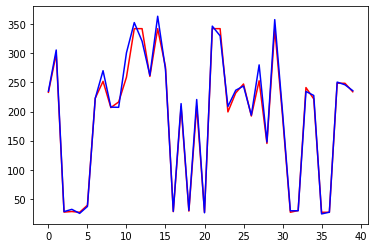

In [0]:
plt.plot(reg.predict(xgx_test[-40:]),color='red')
plt.plot(xgy_test[-40:],color='blue')

XGBOOST is a considerable improvement over LSTM but further data and testing will be required to ensure no overfitting